PART-1

PyTorch Version: 2.0.1+cu118
cuda


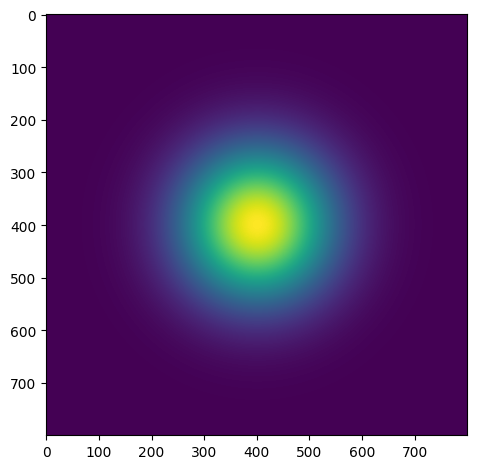

In [1]:
import torch
import numpy as np
print("PyTorch Version:", torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
x = torch.Tensor(X)
y = torch.Tensor(Y)
x = x.to(device)
y = y.to(device)
z = torch.exp(-(x**2+y**2)/2.0)
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

Changing the Gaussian function into a 2D sine or cosine function

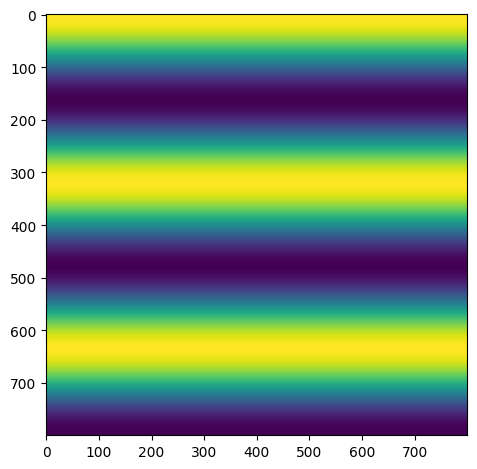

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdividing the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# loading into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfering to the GPU device
x = x.to(device)
y = y.to(device)

# Computing 2D sine function
z = 2*torch.sin(-(x*2))

#plot
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()

What do you get when you multiply both the Gaussian and the sine/cosine function together and visualise it?

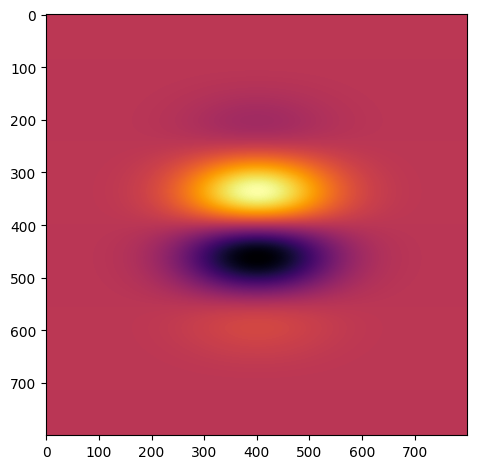

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute 2D sine function
z = torch.exp(-(x**2+y**2)/2.0)*2*torch.sin(-(2*x))

#plot
plt.imshow(z.cpu().numpy(), cmap='inferno')
plt.tight_layout()
plt.show()


**PART 2**

Mandlebrot Set

<ipython-input-32-313de0ce3a74>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


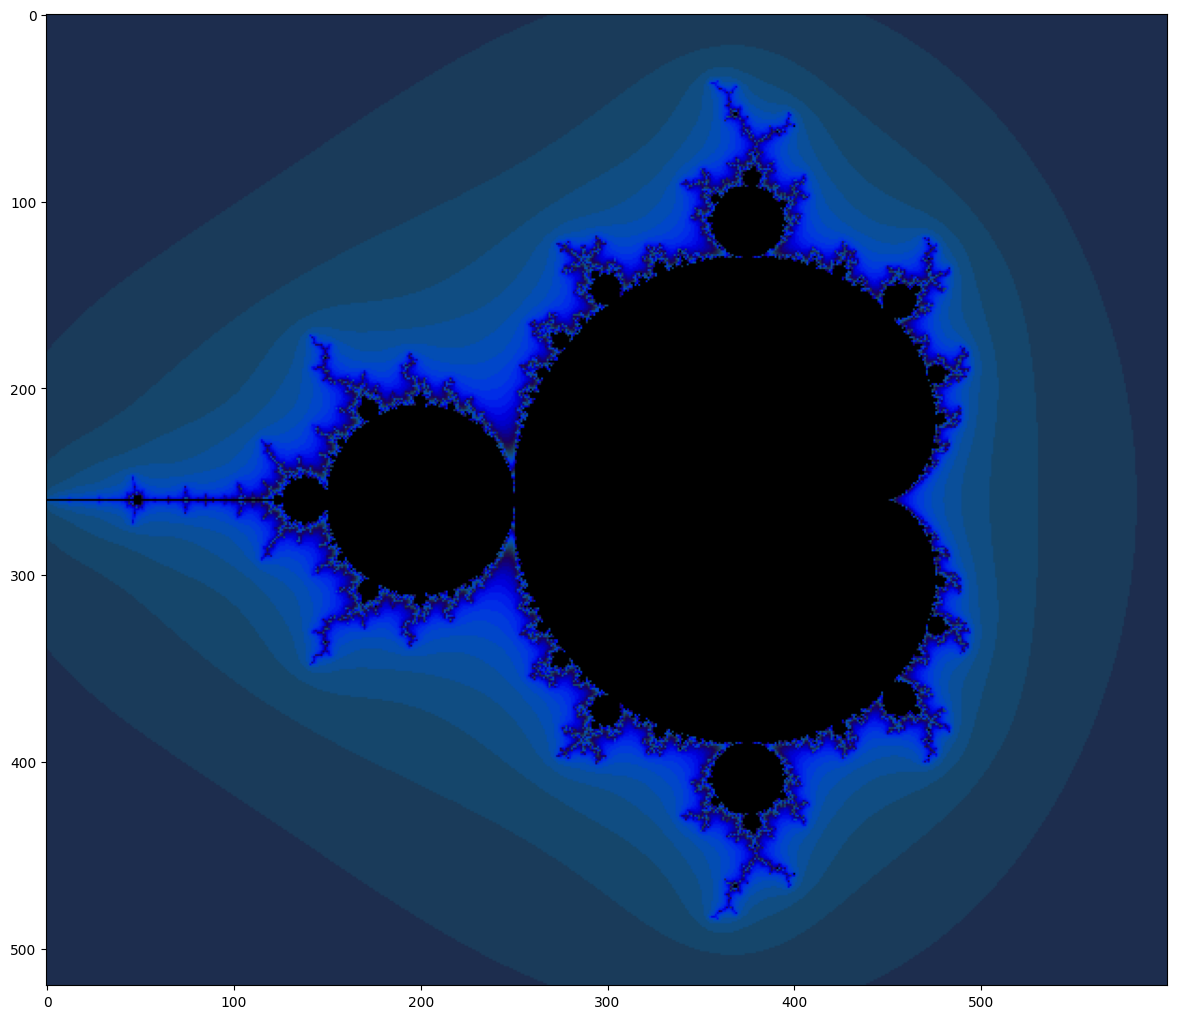

In [32]:
import torch
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
for i in range(200):
  zs_ = zs*zs + z
  not_diverged = torch.abs(zs_) < 4.0
  ns += not_diverged
  zs = zs_
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


High resolution computation of the set by decreasing the mgrid spacing and zooming to another part of the Mandelbrot set and compute the image for it. This may increase the computation time significantly, so choose a value that balances quality of the image and time spent.

<ipython-input-33-c674a5c3e759>:28: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


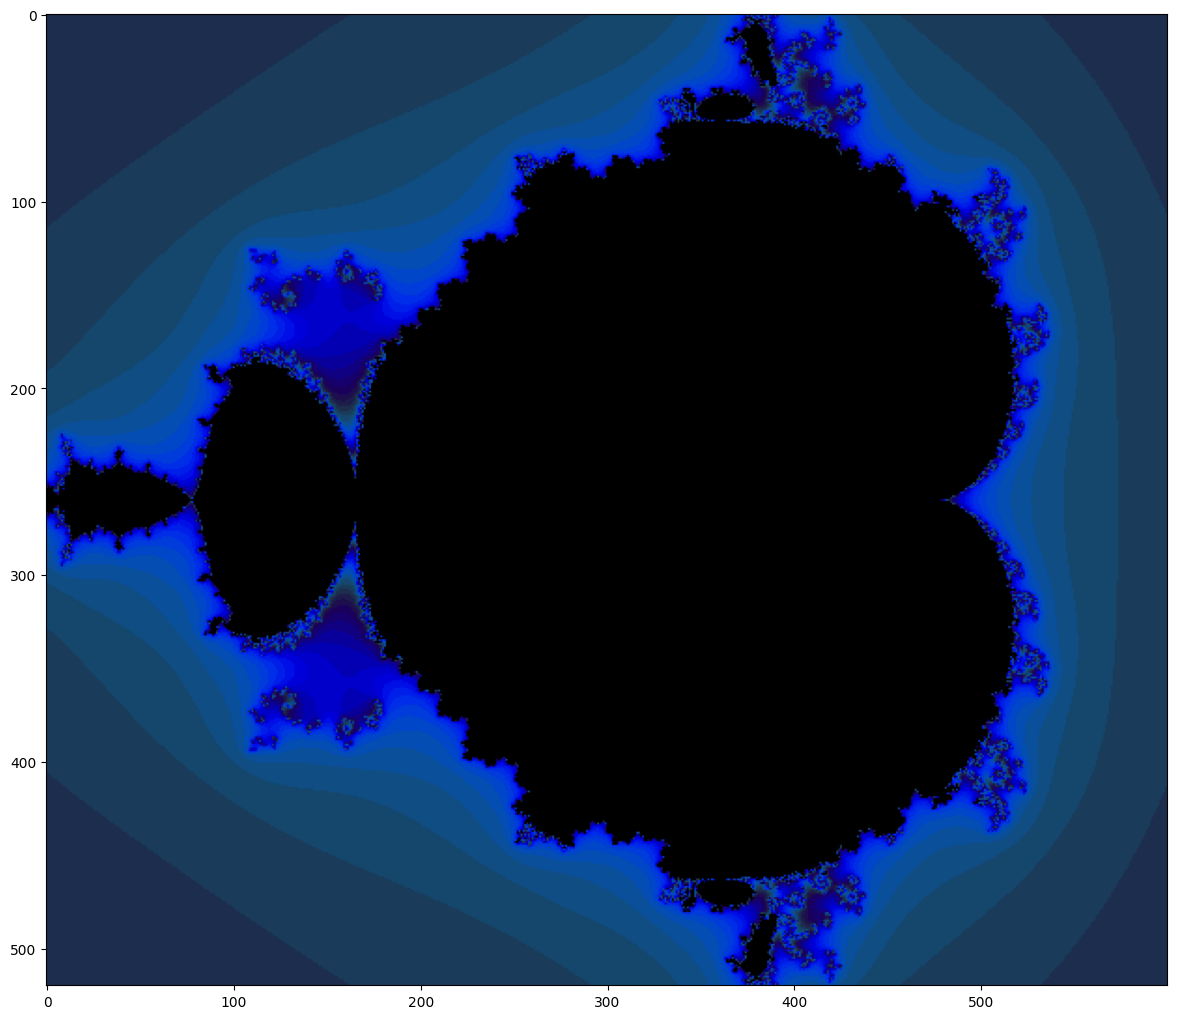

In [33]:
import torch
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
for i in range(200):
  zs_ = zs*zs + z
  zs_ = zs_*0.8
  not_diverged = torch.abs(zs_) < 4.0
  ns += not_diverged
  zs = zs_
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


Convert it to Julia Set

<ipython-input-31-72351feaff13>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


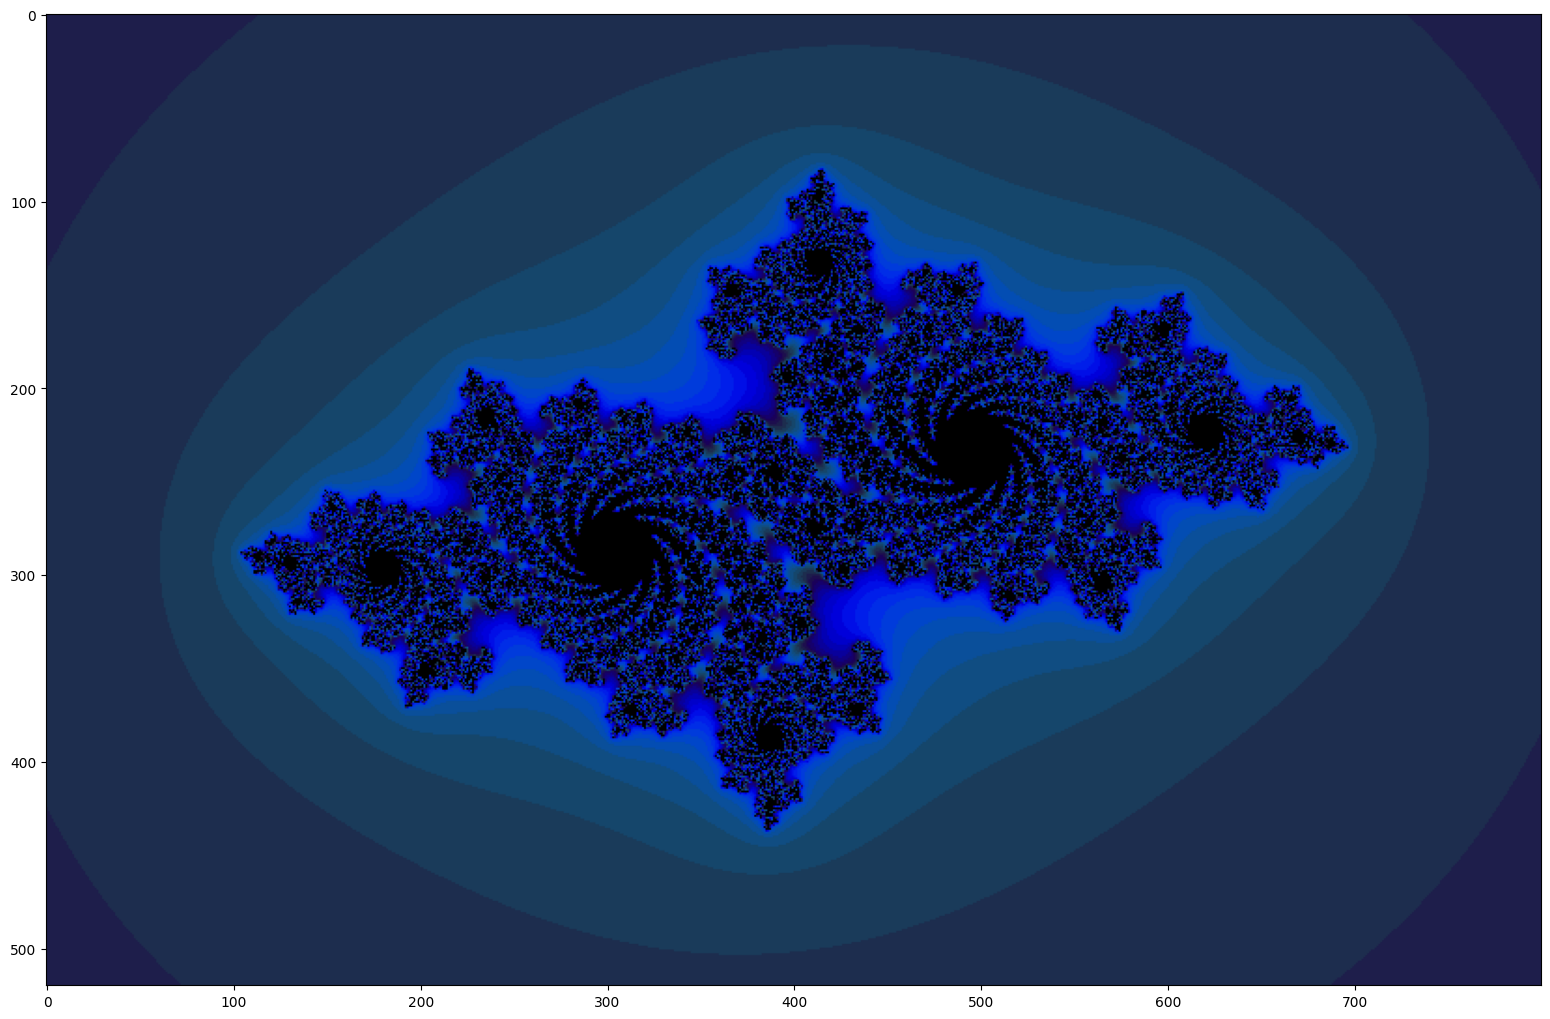

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:2:0.005]
# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)  # Important!
zs = z.clone()  # Updated!
ns = torch.zeros_like(z)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Define the complex constant 'c' for the Julia Set
c = torch.complex(torch.tensor(-0.7), torch.tensor(0.27015))

# Julia Set
for i in range(200):
    # Compute the new values of z: z^2 + c
    zs_ = zs * zs + c
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged
    zs = zs_

# Plot
fig = plt.figure(figsize=(16, 10))
def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

**PART 3**

Douady rabbit fractal

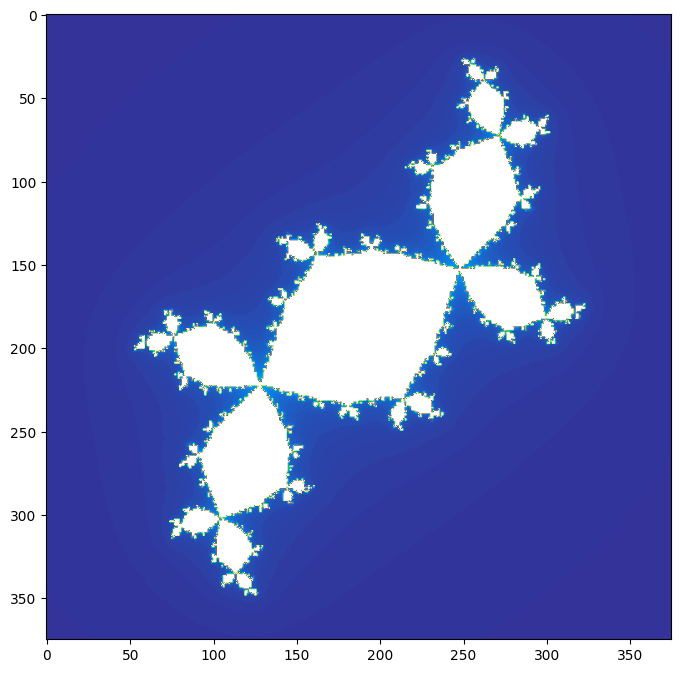

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch

max_iter = 200

# Creating a grid of complex numbers using np.mgrid
x_vals, y_vals = np.mgrid[-1.5:1.5:0.008, -1.5:1.5:0.008]
x, y = torch.tensor(x_vals, dtype=torch.float32), torch.tensor(y_vals, dtype=torch.float32)
z = x + 1j * y

# Initializing an array to store the iteration counts
iterations = torch.zeros_like(x, dtype=torch.int16)

# Douady Rabbit fractal iteration
c = -0.123 + 0.745j
for i in range(max_iter):
    z = z**2 + c
    mask = torch.abs(z) < 100
    iterations += mask

# Plotting the Douady Rabbit fractal
plt.figure(figsize=(8, 12))
plt.imshow(iterations.numpy(), cmap="terrain")
plt.tight_layout(pad=5)
plt.show()